In [36]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [37]:
matFilename = './Data/2017-05-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

In [38]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [39]:
batch = f['batch']

In [40]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [46]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]].value
    policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]].value))
        Qc = np.hstack((f[cycles['Qc'][j,0]].value))
        Qd = np.hstack((f[cycles['Qd'][j,0]].value))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
        T = np.hstack((f[cycles['T'][j,0]].value))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
        V = np.hstack((f[cycles['V'][j,0]].value))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
        t = np.hstack((f[cycles['t'][j,0]].value))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b1c' + str(i)
    bat_dict[key]=   cell_dict

AttributeError: 'Dataset' object has no attribute 'value'

In [31]:
bat_dict.keys()

dict_keys([])

In [32]:
plt.plot(bat_dict['b1c43']['summary']['cycle'], bat_dict['b1c43']['summary']['QD'])

KeyError: 'b1c43'

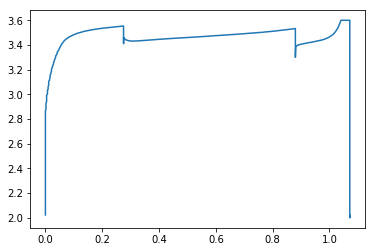

In [23]:
plt.plot(bat_dict['b1c43']['cycles']['10']['Qd'], bat_dict['b1c43']['cycles']['10']['V'])

In [24]:
with open('batch1.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)